# Sound analysis
---
#### TODO
- 


In [1]:
# %matplotlib inline
%matplotlib widget
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.py.utils import *

In [2]:
tidal = '/Users/jarm/Music/Sounds/tidal/'
bdk2 = 'bd/bdk2/'
samples = 16

In [3]:
rate, data = spiowav.read (tidal+'bd/bdk2/kick2_1.wav')
k2_1 = pd.DataFrame(data)

/Users/jarm/anaconda/envs/xeus/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [62]:
k2 = {}
for i in range (16):
    rate, data = spiowav.read (tidal+'bd/bdk2/kick2_' + str(i+1) + '.wav')
    k2[i] = pd.DataFrame (data)

```python
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
```

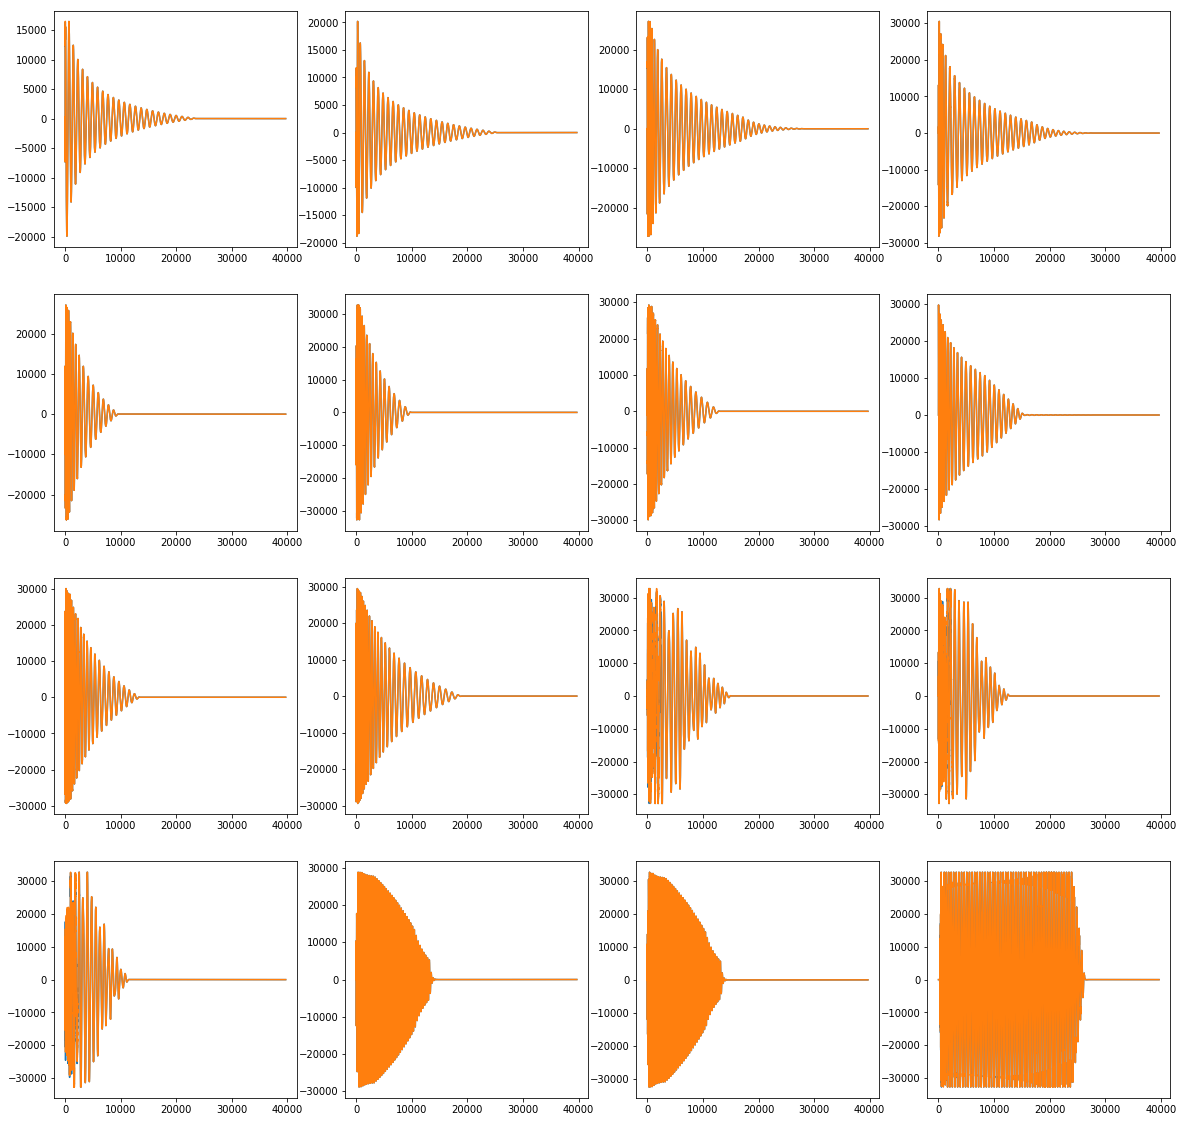

In [70]:
figw, figh = 20, 20
rows, cols = 4, 4
fig, axs = plt.subplots (nrows=rows, ncols=cols, figsize=(figw, figh))
count = 0
for x in range (0,rows):
    for y in range (0,cols):
        axs[x,y].plot (k2[count])
        count += 1

In [109]:
rate, data = spiowav.read (tidal+'plugins/ch2pc/chromaphone2_percussion_' + str(1) + '.wav')
data = pd.DataFrame (data)
data

0     1
0       351   351
1       985   985
2      1960  1960
3      3134  3134
4      4266  4266
5      5243  5243
6      6177  6177
7      7120  7120
8      7933  7933
9      8453  8453
10     8571  8571
11     8407  8407
12     8433  8433
13     8750  8750
14     8859  8859
15     8704  8704
16     8633  8633
17     8505  8505
18     8102  8102
19     7768  7768
20     7910  7910
21     8261  8261
22     8386  8386
23     8241  8241
24     7637  7637
25     6426  6426
26     5218  5218
27     4802  4802
28     4999  4999
29     4749  4749
...     ...   ...
28608     0     0
28609     0     0
28610     0     0
28611     0     0
28612     0     0
28613     0     0
28614     0     0
28615     0     0
28616     0     0
28617     0     0
28618     0     0
28619     0     0
28620     0     0
28621     0     0
28622     0     0
28623     0     0
28624     0     0
28625     0     0
28626     0     0
28627     0     0
28628     0     0
28629     0     0
28630     0     0
28631     0     0
28632     0     0
28633     0     0
28634     0     0
28635     0     0
28636     0     0
28637     0     0

[28638 rows x 2 columns]

In [110]:
ch2pc = {}
for i in range (16):
    rate, data = spiowav.read (tidal+'plugins/ch2pc/chromaphone2_percussion_' + str(i+1) + '.wav')
    data = pd.DataFrame (data)
    data = (data[0].values/2) + (data[1].values/2) # sum to mono
    ch2pc[i] = pd.DataFrame (data)

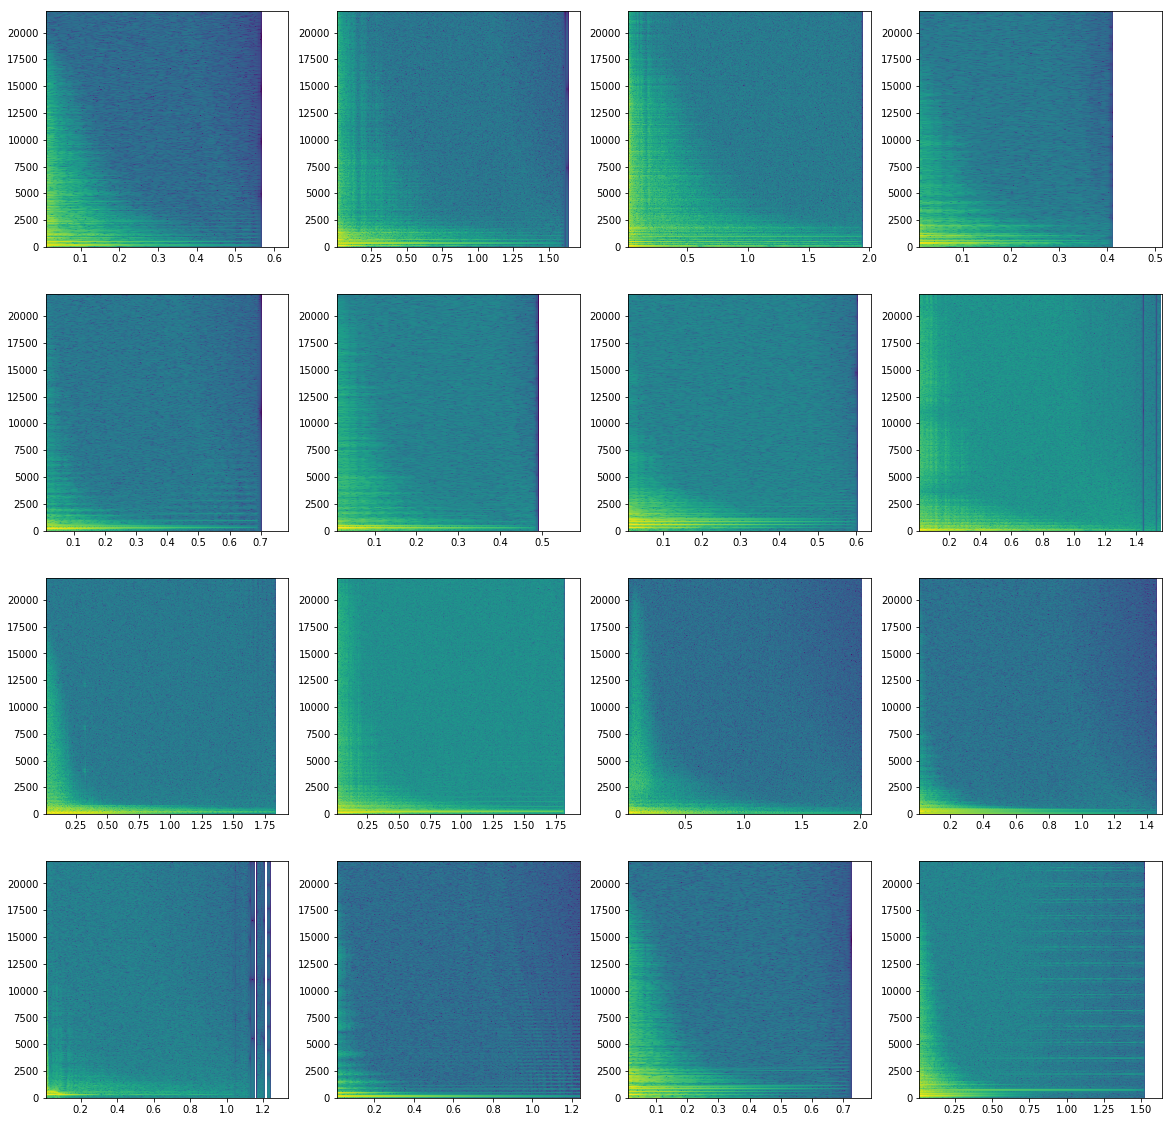

In [134]:
figw, figh = 20, 20
rows, cols = 4, 4
fig, axs = plt.subplots (nrows=rows, ncols=cols, figsize=(figw, figh))
count = 0
for x in range (0,rows):
    for y in range (0,cols):
        axs[x,y].specgram (ch2pc[count].loc[:,0], NFFT=1024, Fs=44100, noverlap=900)
        count += 1

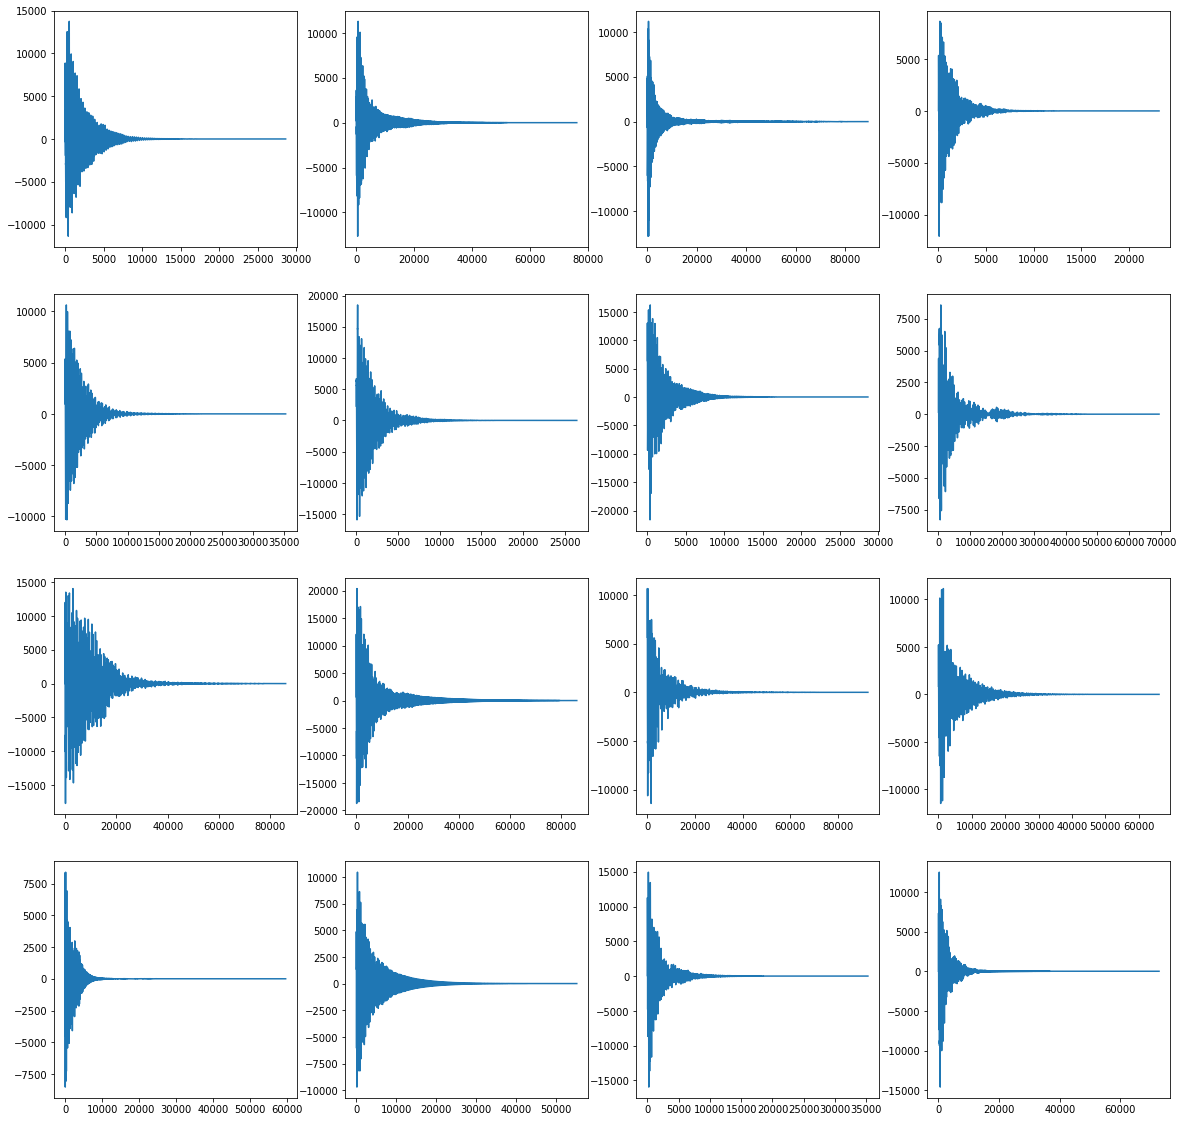

In [111]:
figw, figh = 20, 20
rows, cols = 4, 4
fig, axs = plt.subplots (nrows=rows, ncols=cols, figsize=(figw, figh))
count = 0
for x in range (0,rows):
    for y in range (0,cols):
        axs[x,y].plot (ch2pc[count])
        count += 1

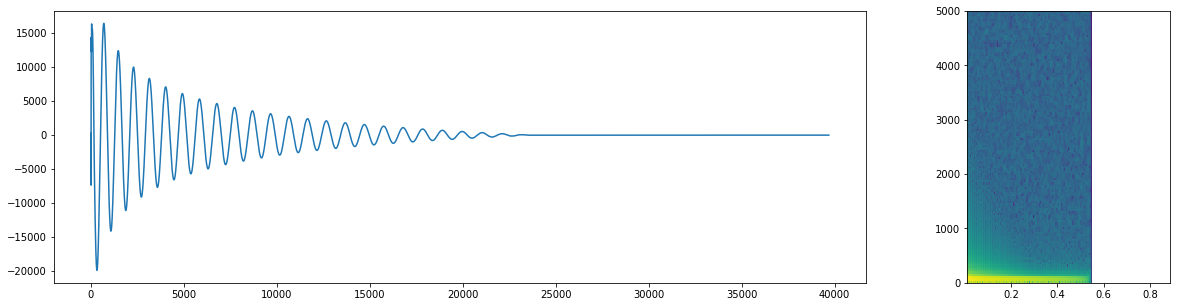

In [49]:
figw, figh = 20, 5
fig, axs = plt.subplots (nrows=1, ncols=2, figsize=(figw, figh), gridspec_kw = {'width_ratios':[4, 1]})
axs[0].plot (k2_1[0])
axs[1].specgram (k2_1[0], NFFT=1024, Fs=44100, noverlap=900)
axs[1].set_ylim(0, 5000)
# ipd.Audio (k2_1[0].values, rate=44100)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,16))
# ax1.plot (selection['Integrator'], color=(1,0,0,1))
# ax1.set_ylim (-0.3, 0.3)
# ax1.set_xlim (0, len(log))
# spec = ax2.specgram(selection['FilterBankLeft'], NFFT=1024, Fs=22050, noverlap=900)